In [1]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import pickle
from datetime import datetime
import matplotlib.pyplot as plt
import sys

KEYS_TO_ADD = ["correctness", "predictions"]

# from stnd.utility.utils import parse_list_from_string
STND_PATH = '../../tmp/stnd'
sys.path.append(STND_PATH)
print(os.listdir(STND_PATH))
from stnd.utility.utils import parse_list_from_string
sys.path.pop(0)

['stnd.egg-info', 'requirements.txt', '.pre-commit-config.yaml', 'tests', '.gitignore', '.github', 'README.md', 'pyproject.toml', 'requirements-test.txt', 'build', 'setup.cfg', 'LICENSE.txt', '.cursor', 'prepare_repo.sh', '.vscode', '.git', 'stnd']


'/home/oh/arubinstein17/github/efficbench/envs/tb_env/lib/python311.zip'

In [2]:
# with open('data/leaderboard_raw_20240118.pickle', 'rb') as handle:
with open('../../data/leaderboard_raw_25042025.pickle', 'rb') as handle:
    df = pickle.load(handle)

In [3]:
models = list(df.keys())
print(len(models))
# 452

452


In [4]:
for key1 in df.keys():
    for key2 in df[key1].keys():
        if df[key1][key2]==None:
            try: models.remove(key1)
            except: pass
models.remove('open-llm-leaderboard/details_mindy-labs__mindy-7b') #for some scenarios, this model has a limited number of responses
print(len(models))
# 395

398


In [5]:
# pruned_models = []
# for model in models[0:10]:
#     if "harness_gsm8k_5" in df[model].keys():
#         pruned_models.append(model)
#     print(df[model].keys())

# print(len(pruned_models))

In [6]:
# dates = np.array([datetime.strptime(df[model]['harness_gsm8k_5']['dates'][0][:10], '%Y_%m_%d') for model in models])
dates = np.array([datetime.strptime(df[model]['harness_hendrycksTest_abstract_algebra_5']['dates'][0][:10], '%Y_%m_%d') for model in models])
order = np.argsort(dates)[::-1]
dates[order][:int(order.shape[0]/4)]

array([datetime.datetime(2024, 1, 17, 0, 0),
       datetime.datetime(2024, 1, 16, 0, 0),
       datetime.datetime(2024, 1, 16, 0, 0),
       datetime.datetime(2024, 1, 16, 0, 0),
       datetime.datetime(2024, 1, 16, 0, 0),
       datetime.datetime(2024, 1, 16, 0, 0),
       datetime.datetime(2024, 1, 15, 0, 0),
       datetime.datetime(2024, 1, 15, 0, 0),
       datetime.datetime(2024, 1, 15, 0, 0),
       datetime.datetime(2024, 1, 15, 0, 0),
       datetime.datetime(2024, 1, 15, 0, 0),
       datetime.datetime(2024, 1, 15, 0, 0),
       datetime.datetime(2024, 1, 14, 0, 0),
       datetime.datetime(2024, 1, 14, 0, 0),
       datetime.datetime(2024, 1, 14, 0, 0),
       datetime.datetime(2024, 1, 14, 0, 0),
       datetime.datetime(2024, 1, 14, 0, 0),
       datetime.datetime(2024, 1, 14, 0, 0),
       datetime.datetime(2024, 1, 14, 0, 0),
       datetime.datetime(2024, 1, 14, 0, 0),
       datetime.datetime(2024, 1, 14, 0, 0),
       datetime.datetime(2024, 1, 14, 0, 0),
       dat

In [7]:
dates[order][:].shape

(398,)

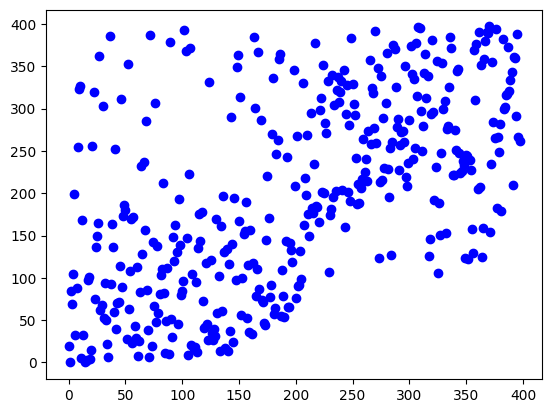

In [8]:
plt.plot(order,'bo')
plt.show()

In [26]:
for sub in df[list(df.keys())[0]].keys():
    for key in KEYS_TO_ADD:
        value = data['data'][sub][key]
        print(sub, key)
        print(len(value))
        for sub_val in value:
            assert len(sub_val) == len(value[0]), f"sub_val: {sub_val} and value[0]: {value[0]} have different lengths"
            if key == 'predictions':
                for sub_sub_val in sub_val:
                    assert len(sub_sub_val) == len(sub_val[0]), f"sub_sub_val: {sub_sub_val} (len: {len(sub_sub_val)}) and sub_val[0]: {sub_val[0]} (len: {len(sub_val[0])}) have different lengths"

        print(np.array(data['data'][sub][key]).dtype)

harness_hendrycksTest_abstract_algebra_5 correctness
100
float64
harness_hendrycksTest_abstract_algebra_5 predictions
398


AssertionError: sub_sub_val: [-1.983853816986084, -0.48385387659072876, -1.968228816986084, -2.374478816986084] (len: 82) and sub_val[0]: [-1.2554941177368164, -1.4742441177368164, -1.2398691177368164, -1.6929941177368164] (len: 84) have different lengths

In [9]:
for sub in df['data'].keys():
    # Convert predictions array to list of floats
    if 'predictions' in df['data'][sub]:
        predictions = df['data'][sub]['predictions']
        df['data'][sub]['predictions'] = [[parse_list_from_string(pred) for pred in model_preds] for model_preds in predictions]

KeyError: 'data'

In [27]:
#model 36 in 'harness_truthfulqa_mc_0' has 104 nans (we will delete that item)
data = {}
data['data'] = {}
data['models'] = [models[o] for o in order]

for sub in df[list(df.keys())[0]].keys():
    data['data'][sub] = {}
    # data['data'][sub]['correctness'] = []
    for key in KEYS_TO_ADD:
        data['data'][sub][key] = []

    for model in models:
        # data['data'][sub]['correctness'].append(df[model][sub]['correctness'])
        for key in KEYS_TO_ADD:
            if key not in df[model][sub].keys():
                value_to_add = None
            else:
                value_to_add = df[model][sub][key]
            if key == 'predictions':
                new_value_to_add = []
                for model_preds in value_to_add:

                    if isinstance(model_preds, str):
                        parsed_model_preds = parse_list_from_string(model_preds, list_separators=[','])
                        new_value_to_add.append(parsed_model_preds)
                        # print(parsed_model_preds)
                    else:
                        new_value_to_add.append(model_preds)
                    assert len(new_value_to_add[-1]) == 4
                    # for pred in model_preds:
                    #     # print(pred)
                    #     # # print(parse_list_from_string(pred, list_separators=[',']))
                    #     # print(float(pred))
                    #     if isinstance(pred, str) and "[" in pred:
                    #         print(pred)
                    #         print(model_preds)
                # value_to_add = [[float(pred) for pred in model_preds] for model_preds in value_to_add]
                value_to_add = new_value_to_add
            data['data'][sub][key].append(value_to_add)

    # data['data'][sub]['correctness'] = np.array(data['data'][sub]['correctness']).T.astype(float)

    for key in KEYS_TO_ADD:
        if key == 'predictions':
            data['data'][sub][key] = np.array(data['data'][sub][key]).transpose(1, 0, 2).astype(float)
        else:
            data['data'][sub][key] = np.array(data['data'][sub][key]).T.astype(float)

In [25]:
order.max()

np.int64(397)

In [28]:
for sub in df[list(df.keys())[0]].keys():
    for key in KEYS_TO_ADD:
        # print(sub, key)
        # print(order)
        # print(type(data['data'][sub][key]))
        # print(len(data['data'][sub][key]))
        # print(len(data['data'][sub][key][0]))
        print(data['data'][sub][key].shape)
        data['data'][sub][key] = data['data'][sub][key][:,order]

    # data['data'][sub]['correctness'] = data['data'][sub]['correctness'][:,order]

(100, 398)
(100, 398, 4)
(135, 398)
(135, 398, 4)
(152, 398)
(152, 398, 4)
(100, 398)
(100, 398, 4)
(265, 398)
(265, 398, 4)
(144, 398)
(144, 398, 4)
(100, 398)
(100, 398, 4)
(100, 398)
(100, 398, 4)
(100, 398)
(100, 398, 4)
(173, 398)
(173, 398, 4)
(102, 398)
(102, 398, 4)
(100, 398)
(100, 398, 4)
(235, 398)
(235, 398, 4)
(114, 398)
(114, 398, 4)
(145, 398)
(145, 398, 4)
(378, 398)
(378, 398, 4)
(126, 398)
(126, 398, 4)
(100, 398)
(100, 398, 4)
(310, 398)
(310, 398, 4)
(203, 398)
(203, 398, 4)
(100, 398)
(100, 398, 4)
(165, 398)
(165, 398, 4)
(198, 398)
(198, 398, 4)
(193, 398)
(193, 398, 4)
(390, 398)
(390, 398, 4)
(270, 398)
(270, 398, 4)
(238, 398)
(238, 398, 4)
(151, 398)
(151, 398, 4)
(545, 398)
(545, 398, 4)
(216, 398)
(216, 398, 4)
(204, 398)
(204, 398, 4)
(237, 398)
(237, 398, 4)
(223, 398)
(223, 398, 4)
(131, 398)
(131, 398, 4)
(121, 398)
(121, 398, 4)
(108, 398)
(108, 398, 4)
(163, 398)
(163, 398, 4)
(112, 398)
(112, 398, 4)
(103, 398)
(103, 398, 4)
(234, 398)
(234, 398, 4)


In [29]:
with open('../../data/lb.pickle', 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)